In [20]:
#importing lib
import pandas as pd
import numpy as np

In [21]:
dataset = pd.read_csv("train.csv")

In [22]:
dataset

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will ü b going to esplanade fr home?\n,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0


In [23]:
dataset.isnull().sum()

sms      0
label    0
dtype: int64

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sms     5574 non-null   object
 1   label   5574 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [25]:
dataset.describe()

,label
count,5574.000000
mean,0.134015
std,0.340699
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [26]:
dataset = pd.read_csv("train.csv", encoding='utf-8', quotechar='"', delimiter=',')

In [27]:
dataset

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will ü b going to esplanade fr home?\n,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0


In [28]:
dataset["labels"] = dataset["label"].map({0 : "Not Racist/Sexist",
                                          1 : "Racist/Sexist"})

In [29]:
dataset

,sms,label,labels
0,"Go until jurong point, crazy.. Available only ...",0,Not Racist/Sexist
1,Ok lar... Joking wif u oni...\n,0,Not Racist/Sexist
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,Racist/Sexist
3,U dun say so early hor... U c already then say...,0,Not Racist/Sexist
4,"Nah I don't think he goes to usf, he lives aro...",0,Not Racist/Sexist
...,...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1,Racist/Sexist
5570,Will ü b going to esplanade fr home?\n,0,Not Racist/Sexist
5571,"Pity, * was in mood for that. So...any other s...",0,Not Racist/Sexist
5572,The guy did some bitching but I acted like i'd...,0,Not Racist/Sexist


In [30]:
data = dataset[["sms", "labels"]]

In [31]:
data

,sms,labels
0,"Go until jurong point, crazy.. Available only ...",Not Racist/Sexist
1,Ok lar... Joking wif u oni...\n,Not Racist/Sexist
2,Free entry in 2 a wkly comp to win FA Cup fina...,Racist/Sexist
3,U dun say so early hor... U c already then say...,Not Racist/Sexist
4,"Nah I don't think he goes to usf, he lives aro...",Not Racist/Sexist
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,Racist/Sexist
5570,Will ü b going to esplanade fr home?\n,Not Racist/Sexist
5571,"Pity, * was in mood for that. So...any other s...",Not Racist/Sexist
5572,The guy did some bitching but I acted like i'd...,Not Racist/Sexist


In [32]:
import re
import nltk
import string

In [33]:
# Importing stop words
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

In [34]:
# Import stemming
stemmer = nltk.SnowballStemmer("english")

In [35]:
# Data Cleaning
def clean_data(text):
    text = str(text).lower()
    text = re.sub('[%s]' %re.escape(string.punctuation), '', text)
    text = re.sub('@#\n\\_', '', text)
# Stopwords
    text = [word for word in text.split(' ') if word not in stopwords]
    text = " ".join(text)
# Stemming
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [36]:
# Removing Emojis
import emoji
import re
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F" #emoticons
                               u"\U0001F300-\U0001F5FF" #symbols & pictographs
                               u"\U0001F680-\U0001F6FF" #transport & map symbols
                               u"\U0001F1E0-\U0001F1FF" # flags 
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U00001F251"
                               "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [37]:
data["sms"] = data["sms"].apply(clean_data, remove_emojis)

C:\Users\Samyak\AppData\Local\Temp\ipykernel_1040\896753931.py:1: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  data["sms"] = data["sms"].apply(clean_data, remove_emojis)
C:\Users\Samyak\AppData\Local\Temp\ipykernel_1040\896753931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["sms"] = data["sms"].apply(clean_data, remove_emojis)


In [38]:
data

,sms,labels
0,go jurong point crazi avail bugi n great world...,Not Racist/Sexist
1,ok lar joke wif u oni\n,Not Racist/Sexist
2,free entri 2 wkli comp win fa cup final tkts 2...,Racist/Sexist
3,u dun say earli hor u c alreadi say\n,Not Racist/Sexist
4,nah dont think goe usf live around though\n,Not Racist/Sexist
...,...,...
5569,2nd time tri 2 contact u u £750 pound prize 2 ...,Racist/Sexist
5570,ü b go esplanad fr home\n,Not Racist/Sexist
5571,piti mood soani suggestions\n,Not Racist/Sexist
5572,guy bitch act like id interest buy someth els ...,Not Racist/Sexist


In [39]:
X = np.array(data["sms"])
Y = np.array(data["labels"])

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [41]:
cv = CountVectorizer()
X = cv.fit_transform(X)

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [43]:
# Building out ML Model
from sklearn.tree import DecisionTreeClassifier

In [44]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [45]:
Y_pred = dt.predict(X_test)

In [46]:
# Confusion Matrix or Accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[1563,   22],
       [  40,  215]], dtype=int64)

In [47]:
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline

<Axes: >

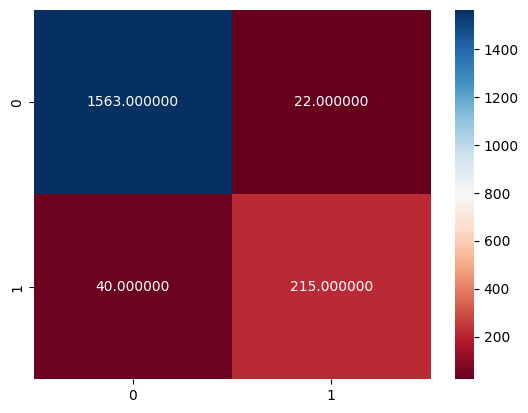

In [48]:
sns.heatmap(cm, annot = True, fmt="f", cmap="RdBu")

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.966304347826087

In [50]:
sample = "Let's not give the seat to a black man."
sample = clean_data(sample)

In [51]:
sample

'let give seat black man'

In [65]:
data1 = cv.transform([sample]).toarray()

In [53]:
data1

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [54]:
dt.predict(data1)

array(['Not Racist/Sexist'], dtype=object)

In [55]:
sample1 = "All human beings are equal"
sample1 = clean_data(sample1)

In [56]:
sample1

'human be equal'

In [57]:
data2 = cv.transform([sample1]).toarray()

In [58]:
data2

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [59]:
dt.predict(data2)

array(['Not Racist/Sexist'], dtype=object)

In [60]:
sample2 = "I hate black people."
sample2 = clean_data(sample2)

In [61]:
sample2

'hate black peopl'

In [62]:
data3 = cv.transform([sample2]).toarray()

In [63]:
data3

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [64]:
dt.predict(data3)

array(['Not Racist/Sexist'], dtype=object)